In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.rc('axes', axisbelow=True)

from utils.visualization import plot_median_errorbars

In [2]:
## BEiT models (bias: ?, weight tying: ?)
## ImageNet 21k - 1.3 TB
## ImageNet 1k - 133 GB
with open('../_data/fig-symmetry-vision-models/full-models/BEiT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-vision-models/BEit.pkl', 'rb') as file:
    params = pickle.load(file)

BEiT_par = [params[key][0] for key in list(params.keys())]
BEiT_score = [models[key][-1].flatten() for key in list(models.keys())]
BEiT_dataset = [1300e9, 1300e9, 1433e9, 1433e9, 1433e9, 1433e9]

## DeiT models (bias: ?, weight tying: ?)
## (data-efficient image transformers) are more efficiently trained transformers for image classification
## requiring far less data and far less computing resources compared to the original ViT models.
##
## "Recently Vision transformers (ViT) closed the gap with the state of the art on ImageNet, without using any convolution. 
##  Nevertheless, a pre-training phase on a large volume of curated data is required for the learned transformer to be effective. 
##  In our paper we achieve a strong performance without requiring a large training dataset, i.e., with Imagenet1k only.
## ## ImageNet 1k - 133 GB (+ unknown data augmentation)
with open('../_data/fig-symmetry-vision-models/full-models/DeiT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-vision-models/Deit.pkl', 'rb') as file:
    params = pickle.load(file)

DeiT_par = [params[key][0] for key in list(params.keys())]
DeiT_score = [models[key][-1].flatten() for key in list(models.keys())]
DeiT_dataset = [133e9, 133e9, 133e9, 133e9]

## ViT models (bias: ?, weight tying: ?)
## pretrained on ImageNet 21-k - 1.3 TB
## finetuned on ImageNet 1-k - 133 GB
##
## Both during pre-training and fine-tuning, a classification head is attached to the last layer. 
## The classification head is implemented by a MLP with one hidden layer at pre-training time and by a single linear layer at fine-tuning time.
with open('../_data/fig-symmetry-vision-models/full-models/ViT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-vision-models/ViT.pkl', 'rb') as file:
    params = pickle.load(file)

ViT_par = [params[key][0] for key in list(params.keys())]
ViT_score = [models[key][-1].flatten() for key in list(models.keys())]
ViT_dataset = [1300e9, 1300e9, 1300e9, 1300e9, 1433e9, 1433e9, 1433e9, 1433e9, 1433e9, 1433e9]

# ViT models with MAE (bias: ?, weight tying: ?)
## pretrained on ImageNet 1-k - 133 GB
##
## First, we develop an asymmetric encoder-decoder architecture, with an encoder that operates only o
## on the visible subset of patches (without mask tokens), along with a lightweight decoder
## that reconstructs the original image from the latent representation and mask tokens
with open('../_data/fig-symmetry-vision-models/full-models/MAEDecoder-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-vision-models/MAE.pkl', 'rb') as file:
    params = pickle.load(file)

MAE_par = [params[key][0] for key in list(params.keys())]
MAE_score = [models[key][-1].flatten() for key in list(models.keys())]
MAE_dataset = [133e9, 133e9, 133e9]

## DINO models (bias: ?, weight tying: ?)
## DINO v1 was pretrained on ImageNet 1k without labels
## DINO v2 was pretrained on a custom dataset called LVD-142M (a curated selection of images from many different sources)
## There is no publicly available information on the size of the dataset
## rough estimate: a single JPEG from ImageNet has a average size between 50 KB to 200 KB (47.68e-6 GB to 190.7e-6 GB)
## average JPEG size = 119.2e-6 GB  4.757 TB
## assuming this average size for every image: 142109386 * 119.2e-6 GB = 1693 GB
with open('../_data/fig-symmetry-vision-models/full-models/DINO-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-vision-models/DINO.pkl', 'rb') as file:
    params = pickle.load(file)

DINO_par = [params[key][0] for key in list(params.keys())]
DINO_score = [models[key][-1].flatten() for key in list(models.keys())]
DINO_dataset = [133e9, 133e9, 133e9, 133e9, 1694e9, 1694e9, 1694e9, 1694e9]

## DIT models (bias: ?, weight tying: ?)
with open('../_data/fig-symmetry-vision-models/full-models/DIT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-vision-models/DIT.pkl', 'rb') as file:
    params = pickle.load(file)

DIT_par = [params[key][0] for key in list(params.keys())]
DIT_score = [models[key][-1].flatten() for key in list(models.keys())]

## GIT (images) models (bias: ?, weight tying: ?)
## no information on the dataset size
## base model: 10 M image-text pairs
## large model: 20 M image-text pairs
## big GIT model: 0.8B image-text pairs -> 39TB)
##
## assuming similar size per each image-text pair: 
## base model: (10/800) * 39000 GB = 487.5 GB
## large model: (20/800) * 39000 GB = 975 GB
with open('../_data/fig-symmetry-vision-models/full-models/GIT-images-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-vision-models/GIT.pkl', 'rb') as file:
    params = pickle.load(file)
GIT_images_par = [params[key][0] for key in list(params.keys())]
GIT_images_score = [models[key][-1].flatten() for key in list(models.keys())]
GIT_images_dataset = [487.5e9, 975e9]

'------------------------------------------'

## iGPT (text) models (bias: ?, weight tying: n)
## GPT-2 like model trained to predict the next pixel value (but also mixed with BERT objective during pre-training)
## pretrained on ImageNet 21-k - 1.3 TB
with open('../_data/fig-symmetry-vision-models/full-models/iGPT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-vision-models/iGPT.pkl', 'rb') as file:
    params = pickle.load(file)

iGPT_par = [params[key][0] for key in list(params.keys())]
iGPT_score = [models[key][-1].flatten() for key in list(models.keys())]
iGPT_dataset = [1300e9, 1300e9, 1300e9]

## GIT (text) models (bias: ?, weight tying: ?)
## no information on the dataset size
## base model: 10 M image-text pairs
## large model: 20 M image-text pairs
## big GIT model: 0.8B image-text pairs -> 39TB)
##
## assuming similar size per each image-text pair: 
## base model: (10/800) * 39000 GB = 487.5 GB
## large model: (20/800) * 39000 GB = 975 GB
with open('../_data/fig-symmetry-vision-models/full-models/GIT-text-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-vision-models/GIT.pkl', 'rb') as file:
    params = pickle.load(file)
GIT_text_par = [params[key][0] for key in list(params.keys())]
GIT_text_score = [models[key][-1].flatten() for key in list(models.keys())]
GIT_text_dataset = [487.5e9, 975e9]

/Users/matteosaponati/Desktop/repos/attention-geometry/utils/visualization.py:76: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(parameters[k], median, yerr = [[q1_range], [q2_range]],
/var/folders/yy/3fh2plpd0txg1y9llct3rsv80000gn/T/ipykernel_2172/1089920626.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_median_errorbars((np.array(ViT_par) / np.array(ViT_dataset))[[0,2,3,4,5,6,9]], np.array(ViT_score)[[0,2,3,4,5,6,9]], color = 'cornflowerblue', alpha = .3)


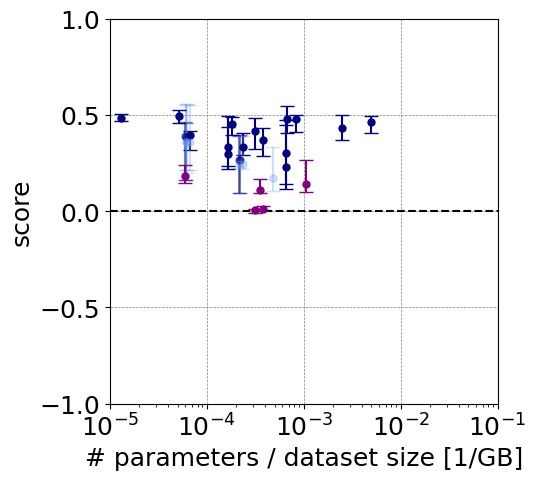

In [4]:
plt.figure(figsize=(5,5))

plot_median_errorbars((np.array(BEiT_par) / np.array(BEiT_dataset))[: 2], BEiT_score[: 2], color = 'navy')
plot_median_errorbars((np.array(BEiT_par) / np.array(BEiT_dataset))[2 :], BEiT_score[2 :], color = 'navy', alpha = .5)
# plot_median_errorbars((np.array(DeiT_par) / np.array(DeiT_dataset)), DeiT_score, color = 'navy', alpha = .5)
plot_median_errorbars((np.array(ViT_par) / np.array(ViT_dataset))[[0,2,3,4,5,6,9]], np.array(ViT_score)[[0,2,3,4,5,6,9]], color = 'cornflowerblue', alpha = .3)
plot_median_errorbars(np.array(MAE_par) / np.array(MAE_dataset), MAE_score, color = 'navy')
plot_median_errorbars((np.array(DINO_par) / np.array(DINO_dataset))[: ], DINO_score[: ], color = 'navy')
plot_median_errorbars((np.array(GIT_text_par) / np.array(GIT_images_dataset)), GIT_images_score, color = 'navy')

plot_median_errorbars((np.array(iGPT_par) / np.array(iGPT_dataset)), iGPT_score, color = 'purple')
plot_median_errorbars((np.array(GIT_text_par) / np.array(GIT_text_dataset)), GIT_text_score, color = 'purple')

plt.axhline(y=0,linestyle='dashed',color='k')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xscale('log')
plt.ylim(-1,1)
plt.xlim(10e-6, 10e-2)
plt.ylabel('score')
plt.xlabel('# parameters / dataset size [1/GB]')

plt.savefig('../figures/fig-pretrained-overparameterization-vision.pdf', format='pdf', dpi=300)